In [24]:
from opt.mc_sim import *
import time
from common.variables import *

In [25]:
import pickle as pkl
from opt.eval_policy import *

filename = "output/msource_value_dic_07-07-2022-00-30-20.pkl"

with open(filename, 'rb') as f:
    output_obj = pkl.load(f)

value_dic = output_obj["state_value_dic"]
model_params = output_obj["model_params"]
sourcingEnv = output_obj["mdp_env"]

In [26]:
# output_obj['approx_di_cost'] 

In [27]:
model_params

{'algo_params': {'prob_epsilon': 1e-08,
  'periods': 30,
  'nested_mc_iters': 31,
  'mc_episodes': 29,
  'max_steps': 38,
  'explore_eps': 0.05,
  'debug_bool': 0,
  'fixed_learn_rate': 0.1},
 'policy_params': {'h_cost': 2,
  'b_penalty': 10,
  'small_s': 1,
  'big_s': 2,
  'n_suppliers': 2,
  'backorder_max': -10,
  'inven_limit': 30},
 'mdp_env_params': {'lambda': 50,
  'max_inven': 30,
  'action_size': 4,
  'discount_fac': 1.0,
  'procurement_cost_vec': [45, 5],
  'supplier_lead_times_vec': [0.019, 0.4],
  'on_times': [1, 1],
  'off_times': 'no_disrup'},
 'eval_params': {'safe_factor': 1.1,
  'n_visit_limit': 2,
  'sub_eval_periods': 30,
  'sub_nested_mc_iter': 30},
 'dual_index': {'di_safety_factor': 5, 'delta_cand_range': 20},
 'git_commit': 'bab9c4101d25c7df2d9d7c9168358dae619a1064',
 'branch_name': 'master'}

In [28]:
output_obj

{'state_value_dic': {'[-1, 0, 0, 1, 1]': (-111.55714040018741, 86),
  '[0, 0, 0, 0, 1]': (-30.97756642817395, 119),
  '[0, 0, 0, 1, 0]': (-32.8256225054505, 300),
  '[-1, 0, 1, 1, 1]': (-63.0238761687527, 93),
  '[0, 0, 1, 1, 1]': (-33.872843864148024, 51),
  '[0, 0, 1, 0, 1]': (-33.89027891857033, 179),
  '[0, 0, 1, 1, 0]': (-32.150581931036655, 60),
  '[-1, 0, 2, 1, 1]': (-30.358208564516136, 87),
  '[0, 0, 2, 1, 1]': (-34.22547849462366, 50),
  '[0, 0, 2, 0, 1]': (-30.953939398239747, 178),
  '[0, 0, 2, 1, 0]': (-33.28376344086021, 88),
  '[-1, 0, 3, 1, 1]': (-32.295303118279584, 87),
  '[0, 0, 3, 1, 1]': (-30.37248387096775, 50),
  '[0, 0, 3, 0, 1]': (-31.524984623655918, 178),
  '[0, 0, 3, 1, 0]': (-29.808241935483878, 30),
  '[-1, 0, 4, 1, 1]': (-30.68489838709678, 87),
  '[0, 0, 4, 1, 1]': (-30.380376344086017, 50),
  '[0, 0, 4, 0, 1]': (-31.600156475323654, 178),
  '[0, 0, 4, 1, 0]': (-30.947311827956987, 30),
  '[-1, 0, 5, 1, 1]': (-32.37439753763441, 87),
  '[0, 0, 5, 1, 1]':

In [29]:
# output_obj['adp_cost']

In [30]:
sourcingEnv2 = SourcingEnv(
        lambda_arrival = LAMBDA, # or 10
        procurement_cost_vec = np.array([1, 3]),
        supplier_lead_times_vec = np.array([0.8, 0.5]),
        on_times = np.array([1, 1]), 
        off_times = np.array([np.Inf, np.Inf]))

In [31]:
best_small_s, best_big_s, best_val = find_opt_ss_policy_via_mc(sourcingEnv, periods = 20, nested_mc_iters = 50)
# best (s, S) policy found by MC:: (2, 5)

new best value: (0, 1, -32.348)


KeyboardInterrupt: 

In [ ]:
best_small_s, best_big_s

(2, 4)

In [ ]:
# model_params['branch_name'], model_params['git_commit']

In [ ]:
# sourcingEnv = SourcingEnv(
#         lambda_arrival = 8, # or 10
#         procurement_cost_vec = np.array([3, 1, 2]),
#         supplier_lead_times_vec = np.array([0.8, 0.5, 1.0]),
#         on_times = np.array([1, 1, 2]), 
#         off_times = np.array([0.3, 1, 0.2]))

# Dual Sourcing
# sourcingEnv = SourcingEnv(
#         lambda_arrival = LAMBDA, # or 10
#         procurement_cost_vec = np.array([3, 1]),
#         supplier_lead_times_vec = np.array([0.8, 0.5]),
#         on_times = np.array([1, 1]), 
#         off_times = np.array([0.3, 1]))

s_custom = MState(stock_level = 0, 
    n_suppliers = N_SUPPLIERS, 
    n_backorders = np.array([0, 0]), 
    flag_on_off = np.array([1, 1]))

mc_avg_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 100,
    big_s = model_params['policy_params']['big_s'],
    small_s = best_small_s, # model_params['policy_params']['small_s'],
    h_cost = best_big_s, #model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    use_tqdm = True)

# print(mc_avg_costs)

100%|██████████| 100/100 [00:01<00:00, 67.08it/s]


In [ ]:
# mc_avg_costs = mc_with_ss_policy(sourcingEnv, 
#     periods = 100,
#     nested_mc_iters = 50,
#     big_s = 5,
#     small_s = 2,
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'])

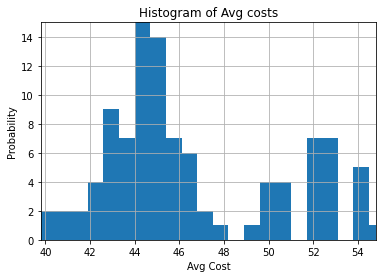

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.7
n, bins, patches = plt.hist(mc_avg_costs, bins=np.arange( np.min(mc_avg_costs), np.max(mc_avg_costs) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs), np.max(mc_avg_costs))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [ ]:
print(np.mean(np.array(mc_avg_costs)))

46.55766666666666


In [ ]:
print(np.median(np.array(mc_avg_costs)))

45.2


In [ ]:
np.std(np.array(mc_avg_costs))

4.987855651479903

In [ ]:
single_supplier_mean_costs = []
for s in range(sourcingEnv2.n_suppliers):

    kwargs = {"periods" : 30,
        "nested_mc_iters" : 30,
        "h_cost": model_params['policy_params']['h_cost'],
        "b_penalty" : model_params['policy_params']['b_penalty'],
        "supplier_index": s
    }

    single_supplier_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
        use_tqdm = True,
        policy_callback = single_source_orderupto_policy,
        **kwargs)
    
    single_supplier_mean_costs.append(np.mean(single_supplier_costs))



100%|██████████| 30/30 [00:09<00:00,  3.31it/s]


In [ ]:
single_supplier_mean_costs

[46.284444444444446, 27.96111111111111]

In [ ]:
np.min(single_supplier_mean_costs)

27.96111111111111

In [ ]:
mc_avg_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 50,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy,
    use_tqdm = True)

  0%|          | 0/50 [00:00<?, ?it/s]/home/larkin/code/multi-sourcing-inventory/sim/policies.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  overshoot_range = np.array([x for x in sourcingEnv.action_history_tuple if tmark_reg < x[0] < tmark_exp])
100%|██████████| 50/50 [03:30<00:00,  4.21s/it]


In [ ]:
print(np.mean(np.array(mc_avg_costs)))

20.91266666666667


In [ ]:
print(np.median(np.array(mc_avg_costs)))

15.183333333333334


In [ ]:
np.std(np.array(mc_avg_costs))

13.39562762828064

In [ ]:
eval_steps = 5
mc_eval_iter = 5
eval_costs = mc_eval_policy_perf(sourcingEnv, value_dic, 
    max_steps = eval_steps, 
    mc_iters = mc_eval_iter,
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'])

avg_eval_cost = np.mean(eval_costs)

100%|██████████| 5/5 [11:19<00:00, 135.82s/it]


In [ ]:
eval_costs_scaled = np.array(eval_costs)/eval_steps

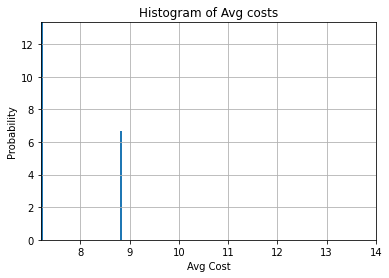

In [ ]:
import numpy as np

binwidth = 0.05

n, bins, patches = plt.hist(eval_costs_scaled, bins=np.arange(min(eval_costs_scaled), max(eval_costs_scaled) + binwidth, binwidth), density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(eval_costs_scaled), np.max(eval_costs_scaled))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [ ]:
np.mean(eval_costs_scaled)

10.24

In [ ]:
np.median(eval_costs_scaled)

8.8

In [ ]:
np.std(eval_costs_scaled)

3.1251239975399376

In [ ]:
len(list(value_dic.keys()))

147007

-12.344827586206897

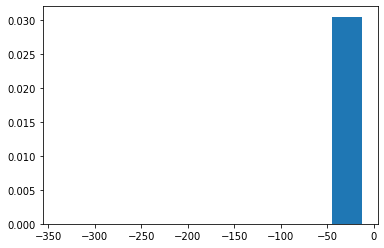

In [ ]:
import numpy as np

binwidth = 0.3

state_vals = [x[0] for x in list(value_dic.values())]
state_visits = [x[1] for x in list(value_dic.values())]

n, bins, patches = plt.hist(state_vals, density = True)
np.max(state_vals)

99

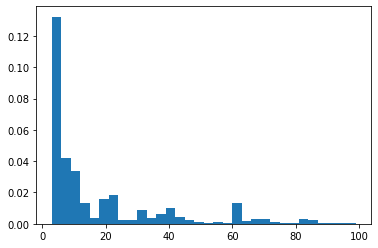

In [ ]:
binwidth = 3
state_visits.remove(1)
state_visits_massage = [x for x in state_visits if 100 > x > 2]

n, bins, patches = plt.hist(state_visits_massage, bins=np.arange(min(state_visits_massage), max(state_visits_massage) + binwidth, binwidth), density = True)
np.max(state_visits_massage)

In [ ]:
np.min(state_visits_massage)

3

In [ ]:
len(set(state_visits))

474

In [ ]:
len(state_visits_massage) - len(state_visits)

-90490

In [ ]:
len(state_visits)

147006

In [ ]:
len(state_vals)

147007

In [ ]:

max(value_dic, key=value_dic.get)


'[26, 26, 2, 1, 1]'

In [ ]:
min(value_dic, key=value_dic.get)

'[-6, 0, 0, 1, 0]'

In [ ]:
value_dic_key_sorted = sorted(value_dic, key=value_dic.get, reverse=True)
value_dic_value_sorted = sorted(value_dic.values(), reverse=True)

In [ ]:
value_diagnostic = list(zip(value_dic_key_sorted, value_dic_value_sorted))

In [ ]:
value_diagnostic

[('[26, 26, 2, 1, 1]', (-12.344827586206897, 1)),
 ('[-8, 7, 11, 1, 1]', (-12.472747497219132, 9)),
 ('[8, 9, 56, 1, 1]', (-12.724137931034482, 1)),
 ('[-9, 0, 30, 1, 0]', (-12.804226918798665, 2)),
 ('[6, 14, 4, 1, 1]', (-12.846496106785315, 1)),
 ('[-6, 25, 11, 1, 1]', (-12.918798665183537, 9)),
 ('[25, 31, 29, 1, 1]', (-12.95884315906563, 1)),
 ('[-15, 30, 26, 1, 1]', (-13.018909899888763, 2)),
 ('[6, 42, 13, 1, 1]', (-13.100111234705228, 1)),
 ('[22, 7, 14, 1, 1]', (-13.265850945494993, 2)),
 ('[26, 16, 14, 1, 1]', (-13.295884315906564, 1)),
 ('[-10, 23, 42, 0, 1]', (-13.342602892102338, 1)),
 ('[4, 25, 14, 1, 1]', (-13.373748609566185, 12)),
 ('[-14, 40, 21, 1, 1]', (-13.384872080088986, 2)),
 ('[23, 3, 42, 1, 1]', (-13.406006674082311, 1)),
 ('[-12, 35, 25, 1, 1]', (-13.480533926585094, 5)),
 ('[-5, 37, 38, 1, 1]', (-13.516129032258064, 1)),
 ('[4, 11, 15, 1, 0]', (-13.537263626251388, 3)),
 ('[10, 14, 38, 1, 0]', (-13.678531701890988, 1)),
 ('[1, 39, 28, 1, 1]', (-13.69410456062

In [ ]:
with open('output/diagnostic_output.txt', 'w') as f:
    for item in value_diagnostic:
        f.write("{i}\n".format(i = str(item)) )

In [ ]:
item

('[-6, 0, 0, 1, 0]', (-339.5910190281133, 464))

In [ ]:
len(value_dic)

147007